## Classical NLP - With NLTK/SpaCy

Natural Language Processing, or NLP for short, is broadly defined as the automatic manipulation of natural language, like speech and text, by software.
The study of natural language processing has been around for more than 50 years and grew out of the field of linguistics with the rise of computers. 

As machine learning practitioners interested in working with text data, we are concerned with the tools and methods from the field of Natural Language Processing.



Text is an extremely rich source of information. Each minute, people send hundreds of millions of new emails and text messages. There’s a veritable mountain of text data waiting to be mined for insights. But data scientists who want to glean meaning from all of that text data face a challenge: it is difficult to analyze and process because it exists in **unstructured form**.

In this tutorial, we’ll take a look at how we can transform all of that unstructured text data into something more useful for analysis and natural language processing, using the helpful Python package spaCy [(documentation)](https://spacy.io/), NLTK [(docs)](https://www.nltk.org/) and scikit learn.

Once we’ve done this, we’ll be able to derive meaningful patterns and themes from text data. This is useful in a wide variety of data science applications: 
* spam filtering
* support tickets
* social media analysis
* contextual advertising
* reviewing customer feedback
* and more.

### Text tokenization

Tokenization is the process of breaking text into pieces, called tokens, and ignoring characters like punctuation marks (,. “ ‘) and spaces. spaCy‘s tokenizer takes input in form of unicode text and outputs a sequence of token objects:

In [15]:
import nltk

text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""

text_tokens = nltk.word_tokenize(text)
text_tokens

['When',
 'learning',
 'data',
 'science',
 ',',
 'you',
 'should',
 "n't",
 'get',
 'discouraged',
 '!',
 'Challenges',
 'and',
 'setbacks',
 'are',
 "n't",
 'failures',
 ',',
 'they',
 "'re",
 'just',
 'part',
 'of',
 'the',
 'journey',
 '.',
 'You',
 "'ve",
 'got',
 'this',
 '!']

### Cleaning Text Data: Removing Stopwords


Most text data that we work with is going to contain a lot of words that aren’t actually useful to us. These words, called stopwords, are useful in human speech, but they don’t have much to contribute to data analysis. Removing stopwords helps us eliminate noise and distraction from our text data, and also speeds up the time analysis takes (since there are fewer words to process).

Let’s take a look at the stopwords spaCy includes by default:

In [16]:
stopwords=nltk.corpus.stopwords.words("english") + nltk.corpus.stopwords.words("italian") + nltk.corpus.stopwords.words("spanish")
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

**Removing Stopwords:**

In [17]:
[t for t in text_tokens if t not in stopwords]

['When',
 'learning',
 'data',
 'science',
 ',',
 "n't",
 'get',
 'discouraged',
 '!',
 'Challenges',
 'setbacks',
 "n't",
 'failures',
 ',',
 "'re",
 'part',
 'journey',
 '.',
 'You',
 "'ve",
 'got',
 '!']

### Lexicon Normalization

In NLP, a lexicon is the set of words composing all known words. We will usually keep it as small as possible, but this changes depending on the problam we are trying to solve. One of the methods to keep a lexicon small is to normalize it using stemming/lemmatization, both ways of processing words that reduces them to their roots.

while words like connect, connection, connecting, connected, etc. aren’t exactly the same, they all have the same essential meaning: connect. The differences in spelling have grammatical functions in spoken language, but for machine processing, those differences can be confusing, so we need a way to change all the words that are forms of the word connect into the word connect itself.

In [18]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [21]:
ps = PorterStemmer()
words = ["program", "programs", "programmer", "programming", "programmers"]
 
for w in words:
    print(w, " : ", ps.stem(w))

program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


### Part of Speech (POS) Tagging

A word’s part of speech defines its function within a sentence. A noun, for example, identifies an object. An adjective describes an object. A verb describes action. Identifying and tagging each word’s part of speech in the context of a sentence is called Part-of-Speech Tagging, or POS Tagging.

In [25]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/idodavid/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [26]:
from nltk import pos_tag

In [31]:
text ="learn about natural language processing is easy and fun"
tokens =  nltk.word_tokenize(text)
tokens_tag = pos_tag(tokens)
for token, token_tag in zip(tokens, tokens_tag):
    print(token, token_tag)

learn ('learn', 'NN')
about ('about', 'IN')
natural ('natural', 'JJ')
language ('language', 'NN')
processing ('processing', 'NN')
is ('is', 'VBZ')
easy ('easy', 'JJ')
and ('and', 'CC')
fun ('fun', 'NN')


### More NLP tools

* Entity Detection - Entity detection, also called entity recognition, is a more advanced form of language processing that identifies important elements like places, people, organizations, and languages within an input string of text. This is really helpful for quickly extracting information from text, since you can quickly pick out important topics or indentify key sections of text.
* Dependency Parsing - Depenency parsing is a language processing technique that allows us to better determine the meaning of a sentence by analyzing how it’s constructed to determine how the individual words relate to each other:
![alt](https://www.dataquest.io/wp-content/uploads/2019/04/text-expressions-python-chart-1.png)
* Word Vector Representation - A word vector is a numeric representation of a word that commuicates its relationship to other words, Also known as embedding vector

# Text classification

In [1]:
import pandas as pd

In [13]:
bad = pd.read_csv('data/nlp_problem/bad_tweets.txt', names = ['id','tweet'], sep='\t')
good = pd.read_csv('data/nlp_problem/good_tweets.txt', names = ['id','tweet'], sep='\t')

In [15]:
bad.shape, good.shape

((3490, 2), (3522, 2))

In [16]:
bad_tweets.head()

,tweet_id,tweet
0,100068216876965888,Social Media - Impact of Social Media on Small Business http://t.co/kVHD52X #small business #social media
1,100523164500631552,Local Business Blogging - What to Blog About http://p.ost.im/p/eRrk2k
2,100991945391878144,13 Hot Facebook Marketing Tips From the Top Pros Â» Social Media Examiner http://t.co/CCdW9tf via @smexaminer {Gr8t tips to save & implement}
3,101021386058903553,"Short of blog ideas? ""Local Business Blogging - What to Blog About http://t.co/hGSP4qi via @YvonneAJones #local #small business"
4,101417008050094080,Eleven Books That Will Rock Your World http://t.co/0FK7cen via @Almost60Really (Paula makes this fun!) #tlcclub


## Data exploration

In [17]:
from pandas import * 
import cufflinks as cf; cf.go_offline()

In [22]:
set_option('display.max_colwidth',200)

In [23]:
good['cls'] = 1
good.sample(5)

,id,tweet,cls
1427,394517015983308800,@Chelikans I do!!! 😩 reunited in 6 months though 😭😭😭😭,1
235,200683525702287360,@anafielle I got the pleasure of working straight through lunch today,1
1326,393549671379247104,@NKOTB_nurse Thank you!!!,1
1907,400404032076140544,"Dude, someone make an android app that adds all Pokemon names to custom dictionaries, I'm being lazy.",1
1491,394968350335700992,@fresa80 I'll say lol!,1


In [47]:
bad['cls'] = 0
bad.sample(5)

,id,tweet,cls
3250,468798312473444352,I just entered to #win a $200 Target Gift Card! Who doesn't love Target! You can join the #giveaway here: http://t.co/MIn95MMeGs #contest,0
1623,287386937671680001,If after trying John's recipes you don't have that perfect healthy dog - http://t.co/7qKNyjuR,0
289,164976637329416192,NewPost: Using Testimonials to Attract More Clients to Your Business http://t.co/TVfKwvWK #customer #blogboost #in #blog30,0
2332,428311505285959680,RT @HannahElliott: The Best New Watches For 2014 http://t.co/qbc0qFsrCt,0
1141,283746018141548544,Tech Armor Apple New iPhone 5 High Definition (HD) Clear Screen Protector with Lifetime Replacement Warra http://t.co/KuZ6fiRK,0


In [25]:
df = good.append(bad, ignore_index = True)
df.cls.value_counts()

1    3522
0    3490
Name: cls, dtype: int64

## Content based model

In [27]:
!pip install ttp

     |████████████████████████████████| 66 kB 252 kB/s eta 0:00:01
  Created wheel for ttp: filename=ttp-0.8.1-py2.py3-none-any.whl size=85618 sha256=617f4f92e4aedf4647619e9f541d2a131116cfbbf358cdcf0bfa9582e6d6b9d0
  Stored in directory: /Users/idodavid/Library/Caches/pip/wheels/ec/80/e1/6696719579b4232dd4bf6de9cc0789036090777f695f5643f0
Successfully built ttp


In [29]:
!pip install emoji

     |████████████████████████████████| 170 kB 129 kB/s eta 0:00:01
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169294 sha256=dace49380000b606789dc7bae698b9e0abd74d831ac73061bc1e4d7e3c57f269
  Stored in directory: /Users/idodavid/Library/Caches/pip/wheels/04/29/50/1e7189f03d2cf139e469863d54a1d3eabeb10c92c84e51f8a1
Successfully built emoji


In [32]:
import string
import emoji
import re as regex

In [33]:
specialChars = ''.join([",", ":", "\"", "=", "&", ";", "%", "$","@", "%", "^", "*", "(", ")", "{", "}",'–','“', '”'
                      "[", "]", "|", "/", "\\", ">", "<", "-","!", "?", ".", "'","--", "---", "#", '‘', '’', '…'])  
space_chars = ['.',',',';', '&', '?','!']
def remove_by_regex(tweets, regexp):
    return tweets.replace(regexp, "")

def remove_urls(tweets):
    return remove_by_regex(tweets, regex.compile(r"http\S+"))

def remove_special_chars(tweets): 
    return tweets.apply(lambda tweet: ''.join([c for c in tweet if c not in specialChars]))

def remove_usernames(tweets):
    return remove_by_regex(tweets, regex.compile(r"@[^\s]+[\s]?"))

def remove_numbers(tweets):
    return remove_by_regex(tweets, regex.compile(r"\s?[0-9]+\.?[0-9]*"))

def remove_emojis(tweets):
    return tweets.apply(lambda tweet: ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI))

def add_spaces(tweets):
    def add_spaces_int(tweet):
        for char in space_chars:
            tweet = tweet.replace(char, char + ' ')
        return tweet
    return tweets.apply(lambda tweet: add_spaces_int(tweet))

def leave_language_only(tweets):
    for f in [remove_urls, remove_emojis, add_spaces, remove_numbers, remove_usernames, remove_special_chars]:
        tweets = f(tweets)
    return tweets

In [76]:
df['pureTextTweet'] = leave_language_only(df.tweet.str.lower())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             7012 non-null   int64 
 1   tweet          7012 non-null   object
 2   cls            7012 non-null   int64 
 3   pureTextTweet  7012 non-null   object
dtypes: int64(2), object(2)
memory usage: 219.2+ KB


In [77]:
df[['tweet','pureTextTweet']].sample()

,tweet,pureTextTweet
3615,"@cpawebster Yep; Bible reading, prayer then off to sleep.",yep bible reading prayer then off to sleep


In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/idodavid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/idodavid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
stopwords=nltk.corpus.stopwords.words("english") + nltk.corpus.stopwords.words("italian") + nltk.corpus.stopwords.words("spanish")
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [78]:
nltk.word_tokenize(df.pureTextTweet.iloc[0])

['what',
 'a',
 'great',
 'tip',
 'ali',
 'no',
 'more',
 'leaving',
 'things',
 'behind',
 'and',
 'having',
 'to',
 'call',
 'the',
 'hotel',
 'in',
 'a',
 'panic']

In [79]:
len(all_words)

51154

In [46]:
all_words = [word for tweet in df.pureTextTweet for word in nltk.word_tokenize(tweet) if word.lower() not in stopwords] # Words without stop words
training_curpos = DataFrame(data = all_words, columns = ['word']).word.value_counts()
training_curpos = training_curpos.reset_index()
training_curpos.columns = ['word','wordCount']
training_curpos['wordImportance'] = len(training_curpos) / training_curpos.wordCount / training_curpos.wordCount.max()
training_curpos.head()

,word,wordCount,wordImportance
0,RT,1336,0.008838
1,win,343,0.034425
2,giveaway,297,0.039756
3,via,271,0.043571
4,Im,263,0.044896


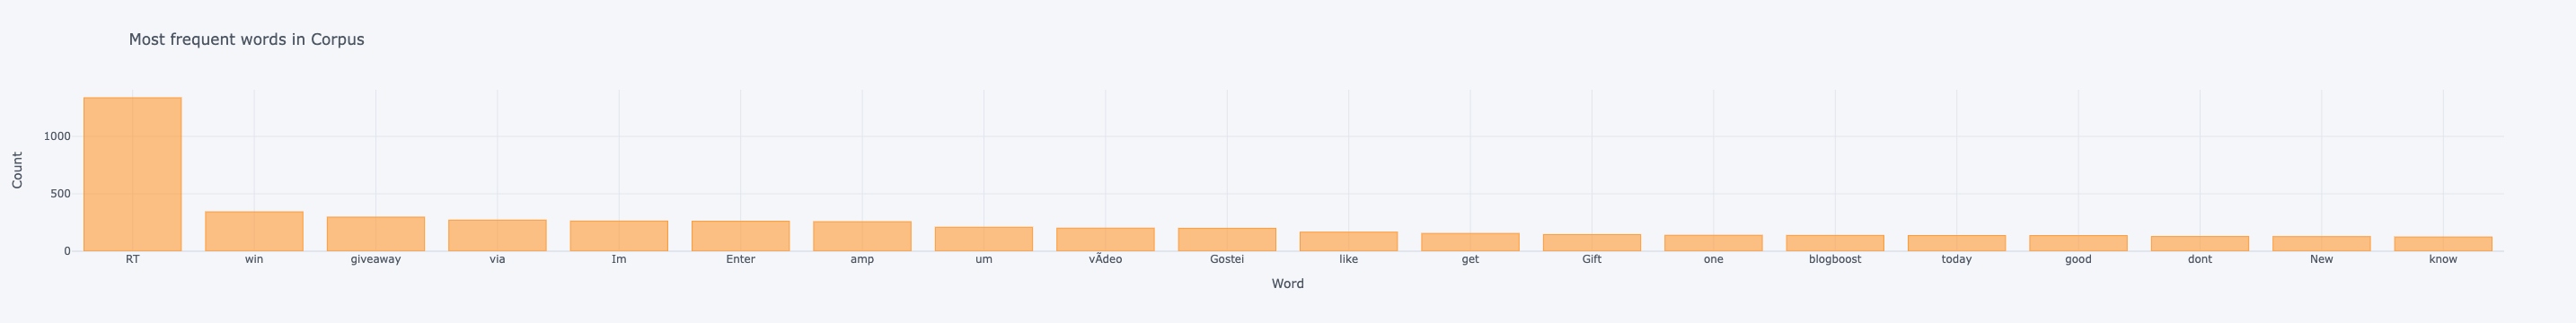

In [48]:
training_curpos.set_index('word').wordCount.head(20).iplot(kind = 'bar', title = 'Most frequent words in Corpus', yTitle = 'Count', xTitle = 'Word')

In [53]:
print("Total of {} words, {} unique words".format(len(all_words), len(training_curpos)))

Total of 51154 words, 15775 unique words


to reduce the corpus size more, we probably don't care about words that appear to little. Let's drop any word which have under 5 appearnces:

In [54]:
print ("Using words with 5 or more appearnces will reduce the corpus size to: {}".format(sum(training_curpos.wordCount >= 5)))

Using words with 5 or more appearnces will reduce the corpus size to: 2061


In [55]:
training_curpos = training_curpos[training_curpos.wordCount >= 5]
training_curpos.to_csv('training_curpos.csv')

### Bag of words (One-hot-encoding)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
corpus_set = set(training_curpos.word)
count_vect = CountVectorizer(vocabulary = corpus_set, tokenizer=nltk.word_tokenize)
bow_counts = count_vect.fit_transform(df.pureTextTweet)
bow_counts.shape

(7012, 2061)

In [57]:
df.iloc[1].pureTextTweet

'Thk you including my post Social MediaImpact of Social Media on Small Business  in Ideas for a Digital Wrld'

In [59]:
print(bow_counts[1])

  (0, 1058)	1
  (0, 1403)	1
  (0, 1409)	1
  (0, 1514)	1
  (0, 1633)	1
  (0, 1772)	1
  (0, 1778)	2


In [58]:
rev_dict = {v:k for k,v in count_vect.vocabulary_.items()}
print(rev_dict[1058])
print(rev_dict[1403])
print(rev_dict[1409])
print(rev_dict[1514])
print(rev_dict[1633])
print(rev_dict[1772])
print(rev_dict[1778])

business
ideas
including
media
post
small
social


In [60]:
bow_counts.sum()

25198

In [61]:
tf_idf_vectorizer = TfidfVectorizer(vocabulary = corpus_set)
bow_tfidf = tf_idf_vectorizer.fit_transform(df.pureTextTweet)
bow_tfidf.shape

(7012, 2061)

In [62]:
bow_tfidf.sum()

11376.760814255951

## Classification

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
X_train, X_test, y_train, y_test = train_test_split(bow_counts, df.cls, train_size=0.8, test_size = 0.2, random_state=1)

In [82]:
%%capture
search_grid = np.logspace(-2, 4, num=50, endpoint=True, base=10.0)
auc_by_alpha = []
for alpha in search_grid:
    model = LogisticRegression(penalty='l2', C=alpha)
    avg_score = cross_val_score(model, bow_counts, y = df.cls, cv = 10, scoring = 'roc_auc').mean()
    auc_by_alpha.append((alpha,avg_score))

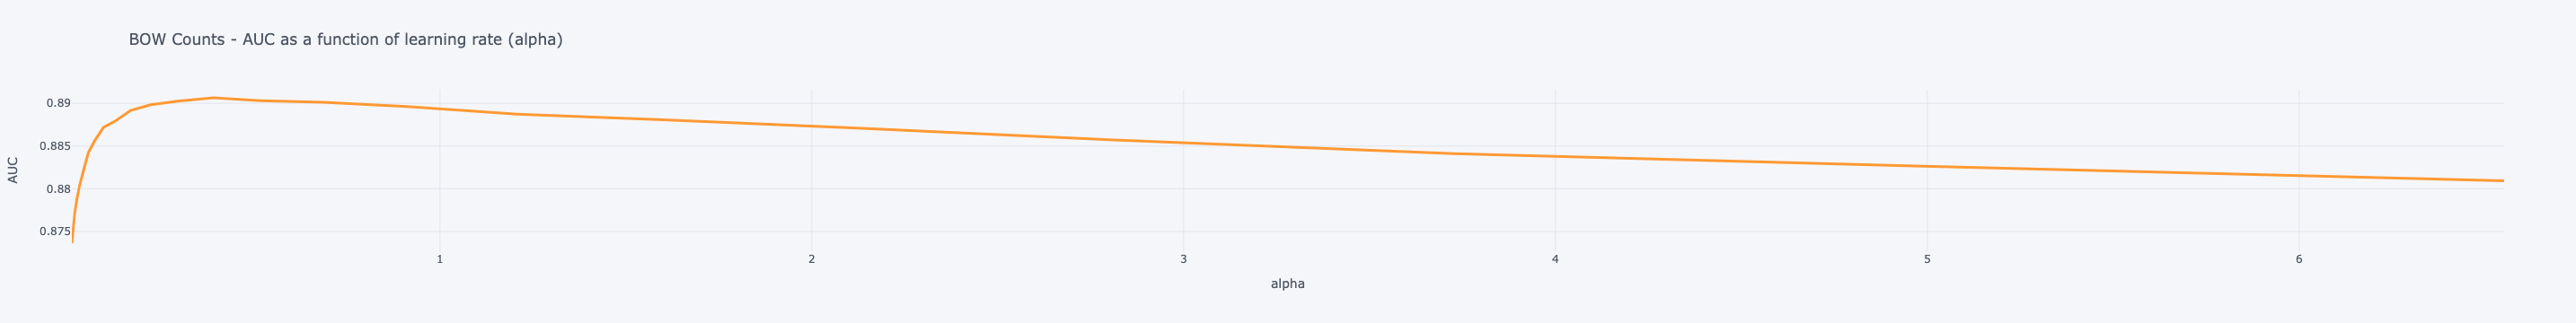

In [73]:
DataFrame(auc_by_alpha, columns = ['alpha', 'AUC']).query('alpha < 8').set_index('alpha').AUC.iplot(title = 'BOW Counts - AUC as a function of learning rate (alpha)', 
                                                                                                   xTitle = 'alpha', yTitle = 'AUC', width = 3)